In [34]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
airline = pd.read_csv(r"Airline-Sentiment-2-w-AA.csv",encoding = 'iso-8859-1')
airline.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [36]:
airline.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'airline_sentiment',
       'airline_sentiment:confidence', 'negativereason',
       'negativereason:confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [37]:
df = airline[["_unit_id", "airline_sentiment", "airline", "text"]]
df.head()

,_unit_id,airline_sentiment,airline,text
0,681448150,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,681448153,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,681448156,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,681448158,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,681448159,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [38]:
df = df[df['airline_sentiment']!='neutral']

In [39]:
for i, row in df.iterrows():
    if row.airline_sentiment == 'positive':
        df.at[i,'airline_sentiment'] = 1
 
    else:
        df.at[i,'airline_sentiment'] = 0
df.head()

,_unit_id,airline_sentiment,airline,text
1,681448153,1,Virgin America,@VirginAmerica plus you've added commercials t...
3,681448158,0,Virgin America,@VirginAmerica it's really aggressive to blast...
4,681448159,0,Virgin America,@VirginAmerica and it's a really big bad thing...
5,681448162,0,Virgin America,@VirginAmerica seriously would pay $30 a fligh...
6,681448165,1,Virgin America,"@VirginAmerica yes, nearly every time I fly VX..."


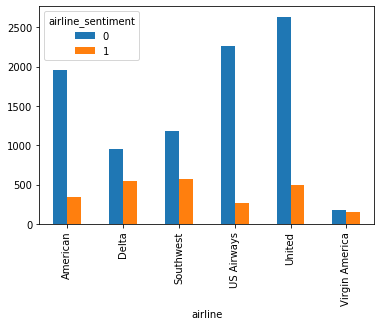

In [40]:
airline_sentiment = df.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

In [42]:
features = list(df['text'])
target = df['airline_sentiment']
processed_features = []

from bs4 import BeautifulSoup


for sentence in range(0, len(features)): 
    
    #remove html tags 
    processed_feature = BeautifulSoup(features[sentence], 'lxml').get_text()
    
    #remove @mentions
    processed_feature = re.sub(r'@[A-Za-z0-9]+','',processed_feature)
    
    #remove URL links 
    processed_feature = re.sub('https?://[A-Za-z0-9./]+','',processed_feature)
    
    #remove symbol #
    processed_feature = re.sub("[^a-zA-Z]", " ", processed_feature)
    
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(processed_feature))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    
    # Converting to Lowercase
    processed_feature = processed_feature.lower()
    
    #Spell correction
    processed_feature = re.sub(r'(.)\1+', r'\1\1', processed_feature)
    
    processed_features.append(processed_feature)

In [44]:
processed_features[:5]

[' plus you ve added commercials to the experience tacky ',
 ' it really aggressive to blast obnoxious entertainment in your guests faces they have little recourse',
 ' and it a really big bad thing about it',
 ' seriously would pay flight for seats that didn have this playing it really the only bad thing about flying va',
 ' yes nearly every time fly vx this ear worm won go away ']

In [45]:
def get_coefs(word,*arr): 
    return word, np.asarray(arr, dtype='float32')

def load_embedding(file):
    if file == '../input/embeddings/wiki-news-300d-1M/wiki-news-300d-1M.vec':
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file) if len(o)>100)
    else:
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file, encoding='latin'))
    return embeddings_index

In [46]:
def make_embedding_matrix(embedding, tokenizer, len_voc):
    all_embs = np.stack(embedding.values())
    emb_mean,emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]
    word_index = tokenizer.word_index
    embedding_matrix = np.random.normal(emb_mean, emb_std, (len_voc, embed_size))
    
    for word, i in word_index.items():
        if i >= len_voc:
            continue
        embedding_vector = embedding.get(word)
        if embedding_vector is not None: 
            embedding_matrix[i] = embedding_vector
    
    return embedding_matrix

In [47]:
glove = load_embedding('glove.6B.100d.txt')

In [48]:
len_voc = 10000

In [49]:
from keras.preprocessing.text import Tokenizer
def make_tokenizer(texts, len_voc):
    t = Tokenizer(num_words=len_voc)
    t.fit_on_texts(texts)
    return t

Using TensorFlow backend.
/home/c/chiranmb/miniconda3/envs/py3k/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/c/chiranmb/miniconda3/envs/py3k/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/c/chiranmb/miniconda3/envs/py3k/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/c/chi

In [50]:
tokenizer = make_tokenizer(processed_features, len_voc)

In [51]:
X_token = tokenizer.texts_to_sequences(processed_features)

In [52]:
X_token[:5]

[[523, 3, 72, 1211, 2238, 1, 2, 161, 4994],
 [11, 107, 2976, 1, 3704, 3705, 902, 10, 14, 2977, 3706, 41, 19, 447, 2239],
 [6, 11, 250, 107, 407, 182, 448, 76, 11],
 [363,
  73,
  262,
  5,
  4,
  188,
  15,
  178,
  19,
  22,
  2016,
  11,
  107,
  2,
  106,
  182,
  448,
  76,
  133,
  1712],
 [170, 1269, 278, 40, 100, 1598, 22, 3707, 4995, 197, 132, 417]]

In [54]:
from keras.preprocessing.sequence import pad_sequences
X_token = pad_sequences(X_token, 30)

In [55]:
index_word = {0: ''}
for word in tokenizer.word_index.keys():
    index_word[tokenizer.word_index[word]] = word

In [56]:
embed_mat = make_embedding_matrix(glove, tokenizer, len_voc)

/home/c/chiranmb/miniconda3/envs/py3k/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [57]:
from sklearn.neighbors import NearestNeighbors

synonyms_number = 5
word_number = 3500

In [58]:
nn = NearestNeighbors(n_neighbors=synonyms_number+1).fit(embed_mat) 
neighbours_mat = nn.kneighbors(embed_mat[1:word_number])[1]
synonyms = {x[0]: x[1:] for x in neighbours_mat}

In [59]:
for x in np.random.randint(1, word_number, 10):
    print(f"{index_word[x]} : {[index_word[synonyms[x][i]] for i in range(synonyms_number-1)]}")

selling : ['buying', 'sell', 'sold', 'sale']
while : ['and', 'instead', 'though', 'but']
didn : ['couldn', 'doesn', 'wouldn', 'wasn']
final : ['second', 'round', 'opening', 'first']
congrats : ['argh', 'aww', 'woohoo', 'trvl']
kid : ['boy', 'dad', 'crazy', 'mom']
daughter : ['wife', 'mother', 'sister', 'niece']
this : ['it', 'same', 'one', 'only']
done : ['sure', 'doing', 'nothing', 'so']
movies : ['films', 'movie', 'hollywood', 'film']


In [60]:
Y = np.asarray(df.airline_sentiment)

In [61]:
Y

array([1, 0, 0, ..., 1, 0, 0], dtype=object)

In [62]:
X_pos = X_token[Y==1]
X_pos

array([[   0,    0,    0, ...,    2,  161, 4994],
       [   0,    0,    0, ...,  197,  132,  417],
       [   0,    0,    0, ...,   30,   44,  392],
       ...,
       [   0,    0,    0, ...,   69, 1464, 2419],
       [   0,    0,    0, ...,   29,  216,    9],
       [   0,    0,    0, ...,    5,    1,  442]], dtype=int32)

In [63]:
def modify_sentence(sentence, synonyms, p=0.5):
    for i in range(len(sentence)):
        if np.random.random() > p:
            try:
                syns = synonyms[sentence[i]]
                sentence[i] = np.random.choice(syns)
            except KeyError:
                pass
    return sentence

In [64]:
# Preview function 
indexes = np.random.randint(0, X_pos.shape[0], 10)


In [65]:
for x in X_pos[indexes]:
    sample =  np.trim_zeros(x)
    sentence = ' '.join([index_word[x] for x in sample])
    print(sentence)

    modified = modify_sentence(sample, synonyms)
    sentence_m = ' '.join([index_word[x] for x in modified])
    print(sentence_m)
    
    print(' ')

thanks
spite
 
thank you left my ipad on plane filled out lost and found form yall found it and shipped it back thank you flysw
thank you left my ipad on jet filled out lost and found form yall been only and shipped it back thank you flysw
 
thank you my second flight already got bumped up to st love it
thank sure my fifth flight has went bumped up to st dream it
 
ll do that can dm until you follow me thanks
jj we it can dm then get come know unfortunately
 
has the most incredible customer service ve ever experienced so refreshing
has same most incredible customer service ve yet experienced but refreshing
 
just want shout out thank the pilots and staff on the feb flight from newark to boston at pm they were super helpful
just do scream out wish the controllers and staff on same feb flight from newark make boston place ends they were super helpful
 
friendly engaging personable handled clarifying questions about baggage fees well and took an interest in what was doing
friendly engagi

In [66]:
df['airline_sentiment'].value_counts()

0    9178
1    2363
Name: airline_sentiment, dtype: int64

In [67]:
n_texts = 6815
indexes = np.random.randint(0, X_pos.shape[0], n_texts)

In [68]:
X_gen_pos = np.array([modify_sentence(x, synonyms) for x in X_pos[indexes]])
X_gen_pos

array([[   0,    0,    0, ...,  156,  718,  712],
       [   0,    0,    0, ..., 4875,    9, 3270],
       [   0,    0,    0, ...,  512,   10, 8500],
       ...,
       [   0,    0,    0, ..., 1813,   37, 5655],
       [   0,    0,    0, ...,   86,  627,   29],
       [   0,    0,    0, ...,  424,  152,  311]], dtype=int32)

In [71]:
X = X_token

In [72]:
X = np.concatenate((X, X_gen_pos), axis = 0)

In [74]:
y_gen_pos = []

for i in range(6815):
    y_gen_pos.append(1)
    
y_gen_pos = np.asarray(y_gen_pos)
y_gen_pos

array([1, 1, 1, ..., 1, 1, 1])

In [77]:
Y = np.concatenate((Y,y_gen_pos), axis = 0)

In [78]:
len(X), len(Y)

(18356, 18356)

In [92]:
print(list(Y).count(1), list(Y).count(0))

9178 9178


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [83]:
y_train =y_train.astype('int')
y_test =y_test.astype('int')

## Rocchio classification

In [84]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups

text_clf = Pipeline([('clf', NearestCentroid())])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.60      0.74      0.66      1872
           1       0.64      0.47      0.54      1800

    accuracy                           0.61      3672
   macro avg       0.62      0.61      0.60      3672
weighted avg       0.62      0.61      0.60      3672



## Boosting

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


text_clf = Pipeline([
                     ('clf', GradientBoostingClassifier(n_estimators=100)),
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1872
           1       0.77      0.80      0.78      1800

    accuracy                           0.79      3672
   macro avg       0.79      0.79      0.79      3672
weighted avg       0.79      0.79      0.79      3672



## Bagging

In [86]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

text_clf = Pipeline([
                     ('clf', BaggingClassifier(KNeighborsClassifier())),
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1872
           1       0.67      0.70      0.69      1800

    accuracy                           0.68      3672
   macro avg       0.69      0.69      0.68      3672
weighted avg       0.69      0.68      0.68      3672



## Naive Bayes

In [87]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups


text_clf = Pipeline([
                     ('clf', MultinomialNB()),
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.68      0.46      0.55      1872
           1       0.58      0.77      0.66      1800

    accuracy                           0.61      3672
   macro avg       0.63      0.62      0.61      3672
weighted avg       0.63      0.61      0.60      3672



## K nearest neighbour

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

text_clf = Pipeline([
                     ('clf', KNeighborsClassifier()),
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      1872
           1       0.67      0.72      0.69      1800

    accuracy                           0.69      3672
   macro avg       0.69      0.69      0.69      3672
weighted avg       0.69      0.69      0.69      3672



## Support Vector Machine

In [101]:
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

text_clf = Pipeline([
                     ('clf', SVC()),
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

/home/c/chiranmb/miniconda3/envs/py3k/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.76      0.58      0.66      1872
           1       0.65      0.81      0.72      1800

    accuracy                           0.69      3672
   macro avg       0.71      0.70      0.69      3672
weighted avg       0.71      0.69      0.69      3672



## Decision Tree

In [90]:
from sklearn import tree

text_clf = Pipeline([
                     ('clf', tree.DecisionTreeClassifier()),
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1872
           1       0.71      0.73      0.72      1800

    accuracy                           0.72      3672
   macro avg       0.72      0.72      0.72      3672
weighted avg       0.72      0.72      0.72      3672



## Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

text_clf = Pipeline([
                     ('clf', RandomForestClassifier(n_estimators=100)),
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1872
           1       0.81      0.85      0.83      1800

    accuracy                           0.83      3672
   macro avg       0.83      0.83      0.83      3672
weighted avg       0.83      0.83      0.83      3672

